# Lecure 8.1 Correlation and linear regression

## Announcement: Syllabus updates for the next two weeks:

This week (week 8): 
- (T, today) introduction to linear models 
- (Th) Netcdf files and analyzing model output

Week 9 : 
- (T) More on plotting and analysing netcdf files (guest lecture by Riley Brady)
- (TH) GIS and python, R vs. python (guest lecture by Tom Yamashita)
- Homework: Research topics due
    -writing a couple of sentences about what you're doing
 
Week 10: 
- (T) General linear models in R (guest lecture by Chris Gabler)
- (Th) Presentation of research topics, Predator Prey Modeling
    -just a couple of slides (ideas, and brainstorm)


## 8.1.1 Student analyis presentations (HW from last week)

## 8.1.2 Correlation

We touched on correlation preivously. Let's dive in.

### A note of caution:

"Correlation does not imply causation"

Example:
As ice cream sales increase, the rate of drowning deaths increases sharply.
Therefore, ice cream consumption causes drowning.

When we get data, we want to describe how variables relate to each other. The simplest question we can ask are two variables correlated, that is do they change togehter?

The metric we use for correlation is the Pearson correlation coefficient, which is hard to grasp intuitively from looking at the equation (see https://en.wikipedia.org/wiki/Correlation_and_dependence). Basically, correlation is a measure of how linearly correlated two variables are, and has values between 1 and -1. If the two variables fall on a straight line and the both increase together, then the correlation is 1. If one increases while the other decreases, the correlation is -1. Correlations near zero mean the two variables are not correlated. 

Let's use the movie data we worked with previously to test if budgets and gross earnings are correlated

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [62]:
file = "movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

(0, 1000000000.0)

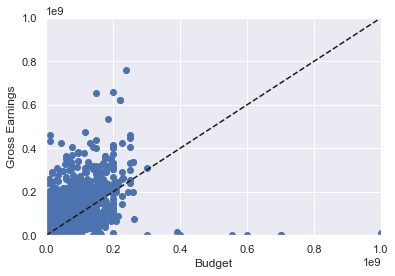

In [63]:
# plot Budget vs Gross Earnings
plt.scatter(movies['Budget'], movies['Gross Earnings'])
plt.plot([0,1E10],[0,1E10], 'k--')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.1E10])
plt.ylim([0,1E9])

In the above I have added the y=x line to visualize if the gross earnings were above the budget. 
Because many of the data points are on top of each other, it is difficult to assess visually the relationship between the two variables

Note that pandas allows us to get the correlation of the entire dataframe all at once. There are many other packages that will do this as well, including numpy.

In [64]:
movies.corr()
# Budget and Gross earnings are not very correlated, r = 0.10

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.030886,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,0.061504,0.007397,-0.003147,0.275707,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.250298,0.173296,0.088449,0.131673,0.123558,0.123074,0.196605,0.013469,0.314765,0.328403,0.258486,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,0.069346,0.001642,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,0.013713,-0.014761,-0.024719,-0.049786,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.102179,0.021090,0.022639,0.044236,0.047451,0.036557,0.062039,-0.019559,0.079621,0.084292,0.119994,0.030688
Gross Earnings,0.030886,0.250298,0.069346,0.102179,1.000000,0.144945,0.154468,0.262768,0.308026,0.247400,0.378082,-0.027755,0.637271,0.559958,0.480601,0.198021
Facebook Likes - Director,-0.063820,0.173296,0.001642,0.021090,0.144945,1.000000,0.090707,0.119587,0.120199,0.119532,0.162036,-0.041297,0.297045,0.221890,0.180674,0.170834
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,0.154468,0.090707,1.000000,0.390466,0.249927,0.951660,0.135320,0.072204,0.192763,0.145461,0.190016,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.262768,0.119587,0.390466,1.000000,0.559662,0.628389,0.243464,0.071177,0.270755,0.219496,0.282306,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.308026,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.099368,0.287239,0.230189,0.271646,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.247400,0.119532,0.951660,0.628389,0.473920,1.000000,0.209754,0.091410,0.265865,0.206923,0.263203,0.085854


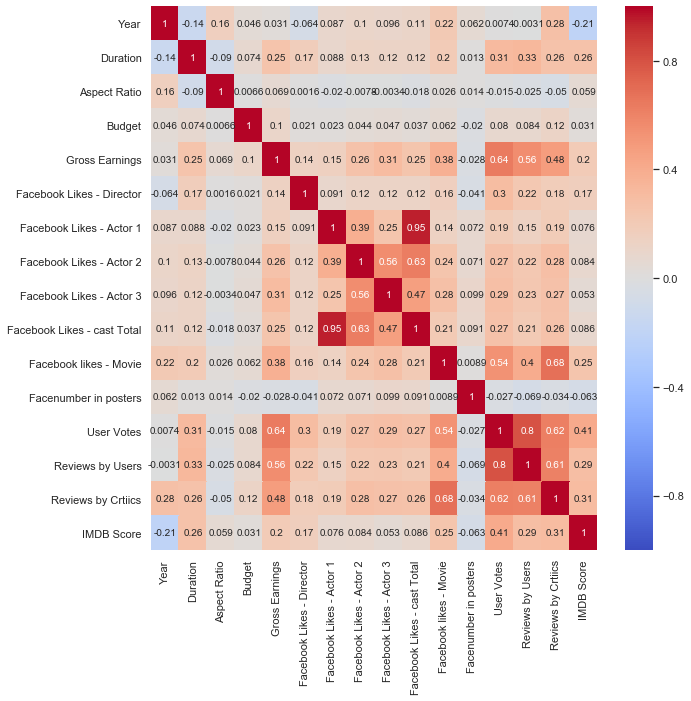

In [65]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(movies.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

### E1. What kind of thing is movies? How do you know?

In [66]:
movies?
movies.dtypes

Year                           float64
Genres                          object
Language                        object
Country                         object
Content Rating                  object
Duration                       float64
Aspect Ratio                   float64
Budget                         float64
Gross Earnings                 float64
Director                        object
Actor 1                         object
Actor 2                         object
Actor 3                         object
Facebook Likes - Director      float64
Facebook Likes - Actor 1       float64
Facebook Likes - Actor 2       float64
Facebook Likes - Actor 3       float64
Facebook Likes - cast Total      int64
Facebook likes - Movie           int64
Facenumber in posters          float64
User Votes                       int64
Reviews by Users               float64
Reviews by Crtiics             float64
IMDB Score                     float64
dtype: object

Type:        DataFrame
String form:
Year  \
           Title                                <...>   7.7
           Yu-Gi-Oh! Duel Monsters                                   7.0
           
           [5042 rows x 24 columns]
Length:      5042
File:        //anaconda3/lib/python3.7/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects

    .. versionchanged :: 0.23.0
       If data is a dict, argument order is maintained for Python 3.6
       and later.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexi

### E2. What does it mean that year and duration are negatively correlated? Plot these two variables togther and explain.

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.030886,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,0.061504,0.007397,-0.003147,0.275707,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.250298,0.173296,0.088449,0.131673,0.123558,0.123074,0.196605,0.013469,0.314765,0.328403,0.258486,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,0.069346,0.001642,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,0.013713,-0.014761,-0.024719,-0.049786,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.102179,0.021090,0.022639,0.044236,0.047451,0.036557,0.062039,-0.019559,0.079621,0.084292,0.119994,0.030688
Gross Earnings,0.030886,0.250298,0.069346,0.102179,1.000000,0.144945,0.154468,0.262768,0.308026,0.247400,0.378082,-0.027755,0.637271,0.559958,0.480601,0.198021
Facebook Likes - Director,-0.063820,0.173296,0.001642,0.021090,0.144945,1.000000,0.090707,0.119587,0.120199,0.119532,0.162036,-0.041297,0.297045,0.221890,0.180674,0.170834
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,0.154468,0.090707,1.000000,0.390466,0.249927,0.951660,0.135320,0.072204,0.192763,0.145461,0.190016,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.262768,0.119587,0.390466,1.000000,0.559662,0.628389,0.243464,0.071177,0.270755,0.219496,0.282306,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.308026,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.099368,0.287239,0.230189,0.271646,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.247400,0.119532,0.951660,0.628389,0.473920,1.000000,0.209754,0.091410,0.265865,0.206923,0.263203,0.085854


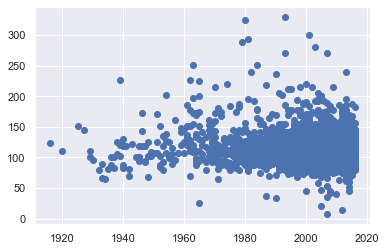

In [67]:
# as year increase, duration slightly decreases
plt.scatter(movies.Year, movies.Duration)
movies.corr()

### E3. Which pairs of variables have the highest correlation? What might explain this?

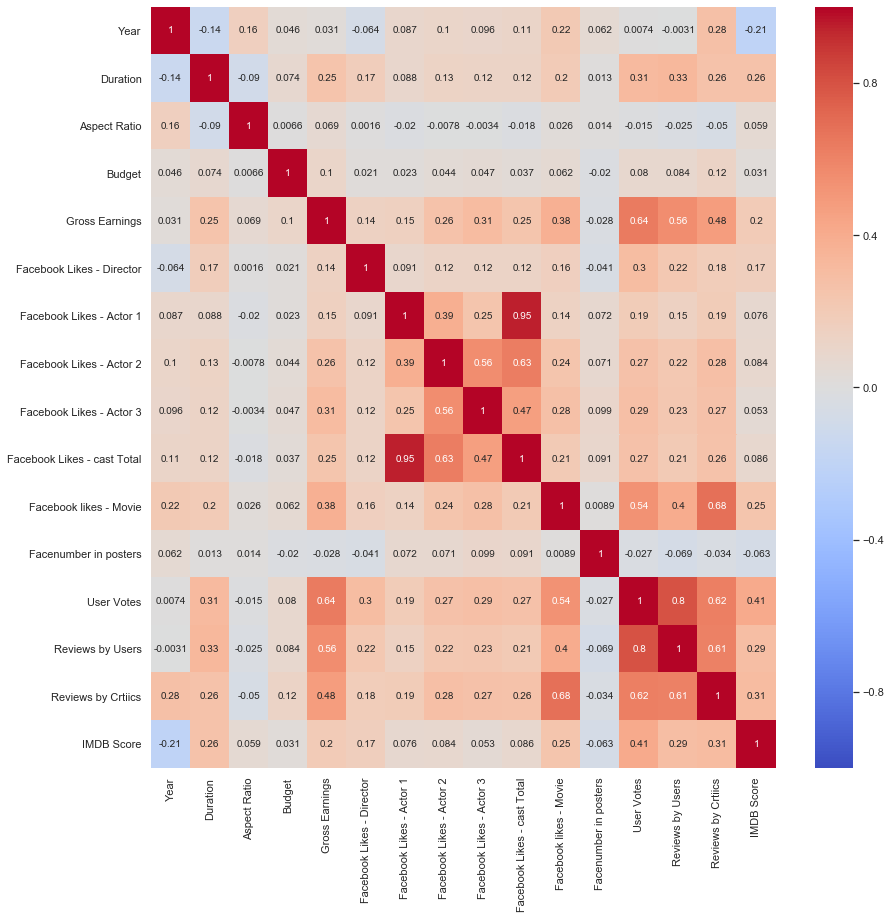

In [68]:
# facebook likes for cast total and for actor 1 have the highest correlation, probably due to actor 1 heavily influencing facebook likes for the total cast
import seaborn as sns

plt.figure(figsize=(14,14))
sns.heatmap(movies.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

## 8.1.3 Introduction to linear regression

See https://en.wikipedia.org/wiki/Linear_regression and http://onlinestatbook.com/2/regression/regression.html for a nice introduction. See https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2 for a good intro on the math

Supposed we were convinced that gross earnings were linearly related to budget, i.e. G = a*B +c. To test this, we would fit the scatterplot we made above to a line, which would solve for the coefficients a (slope) and c (intercept) in our linear equation.

The basic idea of linear regression is that one finds the distance of each data point to a line and minimize this (using calculus) to find the best fit line. This is commonly called ordinary least squares, as the distance of the data from the linear model is squared.

Because the movies database has a number of nans in it, it's a bit difficult to work with. Instead, let's do the tutorial here on linear regression using Boston housing data: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

This tutorial uses the package scikit-learn, which is a collection of advanced data analysis and machine learning functions. We will use this again in the future when we cover machine learning

First lets go over loading in this dataset and converting it to pandas

In [127]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

What we want to do here is to determine which variables contribute to housing prices

In [124]:
# information on the data:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [129]:
# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [126]:
# are room numbers and value correlated?
np.corrcoef(df["RM"], target["MEDV"])

# note this is a matrix of correlation coefficients, you only need the top right one

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

In [74]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


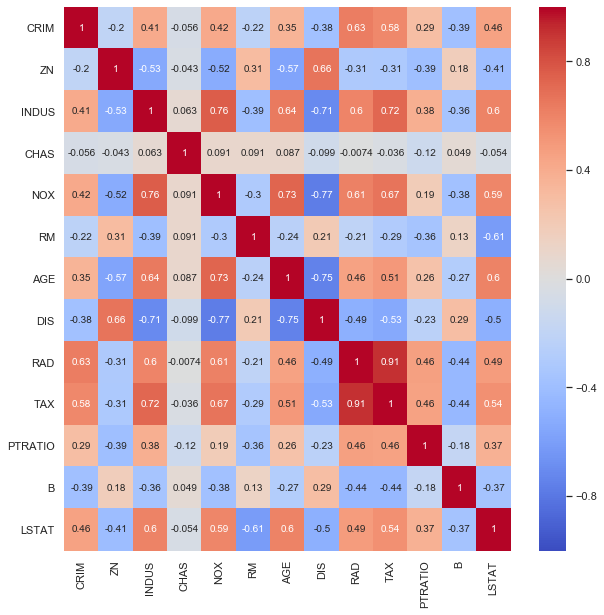

In [75]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [76]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'House value ($1000s)')

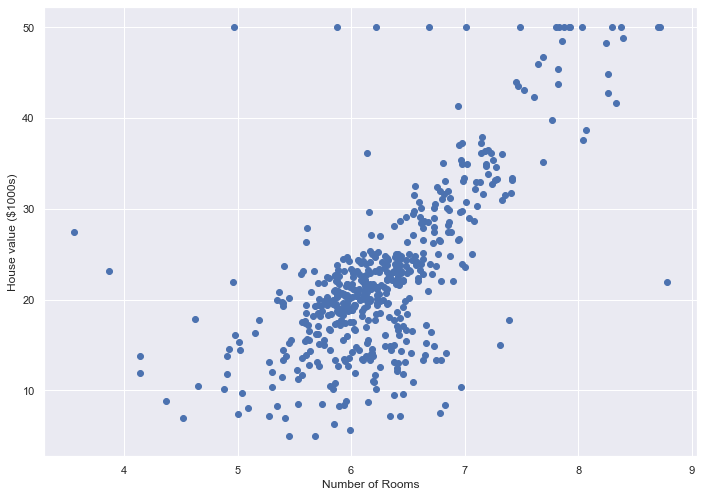

In [118]:
# lets visualize
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

### Discuss: how well does this plot agree with the correlation coefficient we got? What might be affecting the results?

In [78]:
#somewhat agrees, outliers at the extremes of both # of rooms and house value would throw off the plot

### E4. Create a second dataframe with the housing value added as a column. What variables correlate most with housing value? Hypothesize why this might be.

In [108]:
df['TARGET'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


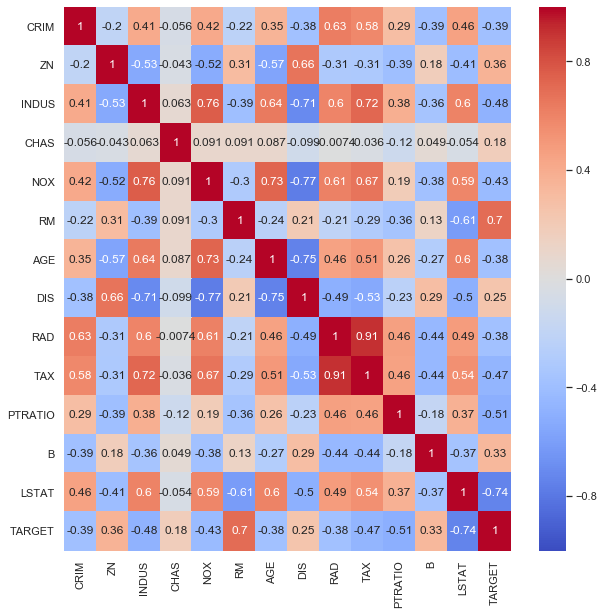

In [109]:
# answer: # of rooms and % of lower population status correlate the most with housing value. Liekly because # of rooms have to do with house size and bigger houses cost more
# and the neighboring housing value will be based largely on your neighbors and the communities socioeconomic status.  Poor neighborhoods have low housing values
# and rich neighborhoods have more expensive houses, etc...

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

Before we go into the online tutorial, which uses scikit learn, let's do some basic linear regression with the scipy and statsmodels packages, so you can see how they compare.

### Doing a linear regression using scipy

In [110]:
from scipy import stats

In [119]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RM"],target["MEDV"])

this gives us the slope and intercept of the line, the corrlation (r_value)

A low p-value (< 0.05) indicates that the linear regression is a good model

the standard error is the standard deviation of the data from the model (instead of the mean)

In [83]:
slope

9.102108981180306

In [84]:
intercept

-34.67062077643854

In [85]:
r_value
# note this is the same correlation value we got before

0.6953599470715394

In [86]:
p_value

2.48722887100781e-74

In [87]:
std_err

0.4190265601213402

Text(0.5, 1.0, 'y = 9.102 x (# of Rooms) + -34.671')

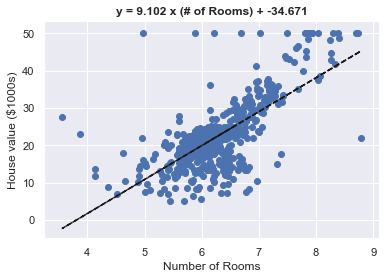

In [88]:
plt.plot(df["RM"], slope*df["RM"]+intercept, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')
plt.title("y = 9.102 x (# of Rooms) + -34.671", fontweight='bold')

### E5. In the above plot, write the equation of the fitted line the title, using the values for the slope and intercept to a reasonable number of signifigant digits.

## Doing a linear regression using statsmodels

Statsmodels is a powerful statistics package that is very popular

See https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

and

https://www.statsmodels.org/dev/index.html

http://www.statsmodels.org/dev/examples/index.html#linear-regression-models

Note that with statsmodels you can do generalized linear regression, i.e. regression with more than one variable: 

y = a*X_1 + b*X_2 + ...

In [89]:
import statsmodels.api as sm

In [90]:
# look at the helpfiles for OLS, ordinary least squares fitting, aka linear fitting, most basic and "easiest" to perform
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  A simple ordinary least squares model.
 |  
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      1-d endogenous response variable. The dependent variable.
 |  exog : array-like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none.'
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and a

In [131]:
# same data as before:
X = df["RM"] # what we think the cost depends on
X2 = sm.add_constant(X)
y = target["MEDV"]

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [132]:
# Note y, the target of what we are fitting to, goes first:
model = sm.OLS(y, X2).fit()

# this is fitting y = aX, with no constant, i.e. using an intercept of zero

In [133]:
model.params

const   -34.670621
RM        9.102109
dtype: float64

In [94]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           2.49e-74
Time:                        15:57:25   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [140]:
predictions = model.predict(X2) # make the predictions by the model
predictions.tail(10)

496    14.389747
497    18.066999
498    20.114973
499    16.019024
500    20.187790
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
dtype: float64

In [141]:
y.tail(10)

496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, dtype: float64

Text(0, 0.5, 'House value ($1000s)')

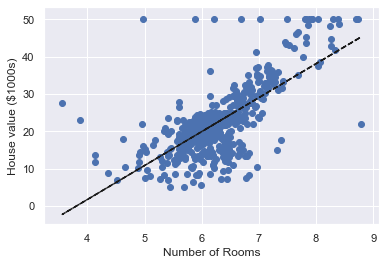

In [96]:
plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')
# this is not a very good fit

The above was not a good fit, because we are assuming the intercept is zero

### E6. Following the example in the documentation below, add an intercept to the model and plot your result

http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

In [97]:
# see above

## Note: if you don't finish the below in lab, complete for homework

### E7. Complete the tutorial: 

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [112]:
# load boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# print data keys to see what dataset contains
boston_dataset.keys()

# creae pd dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

# add MEDV to df
boston['MEDV'] = boston_dataset.target


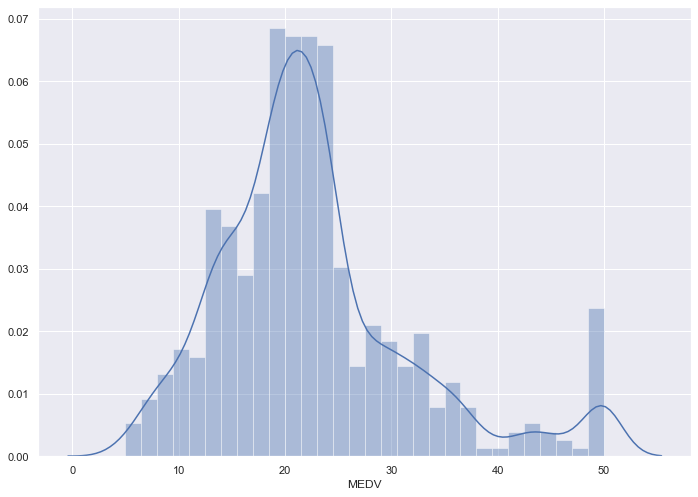

In [99]:
# preprocessing
boston.isnull().sum()

# data exploration
sns.set(rc={'figure.figsize' : (11.7, 8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

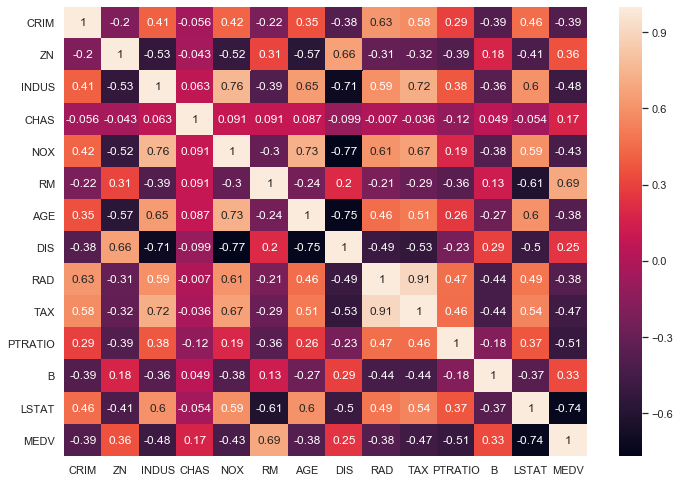

In [100]:
correlation_matrix = boston.corr().round(3)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

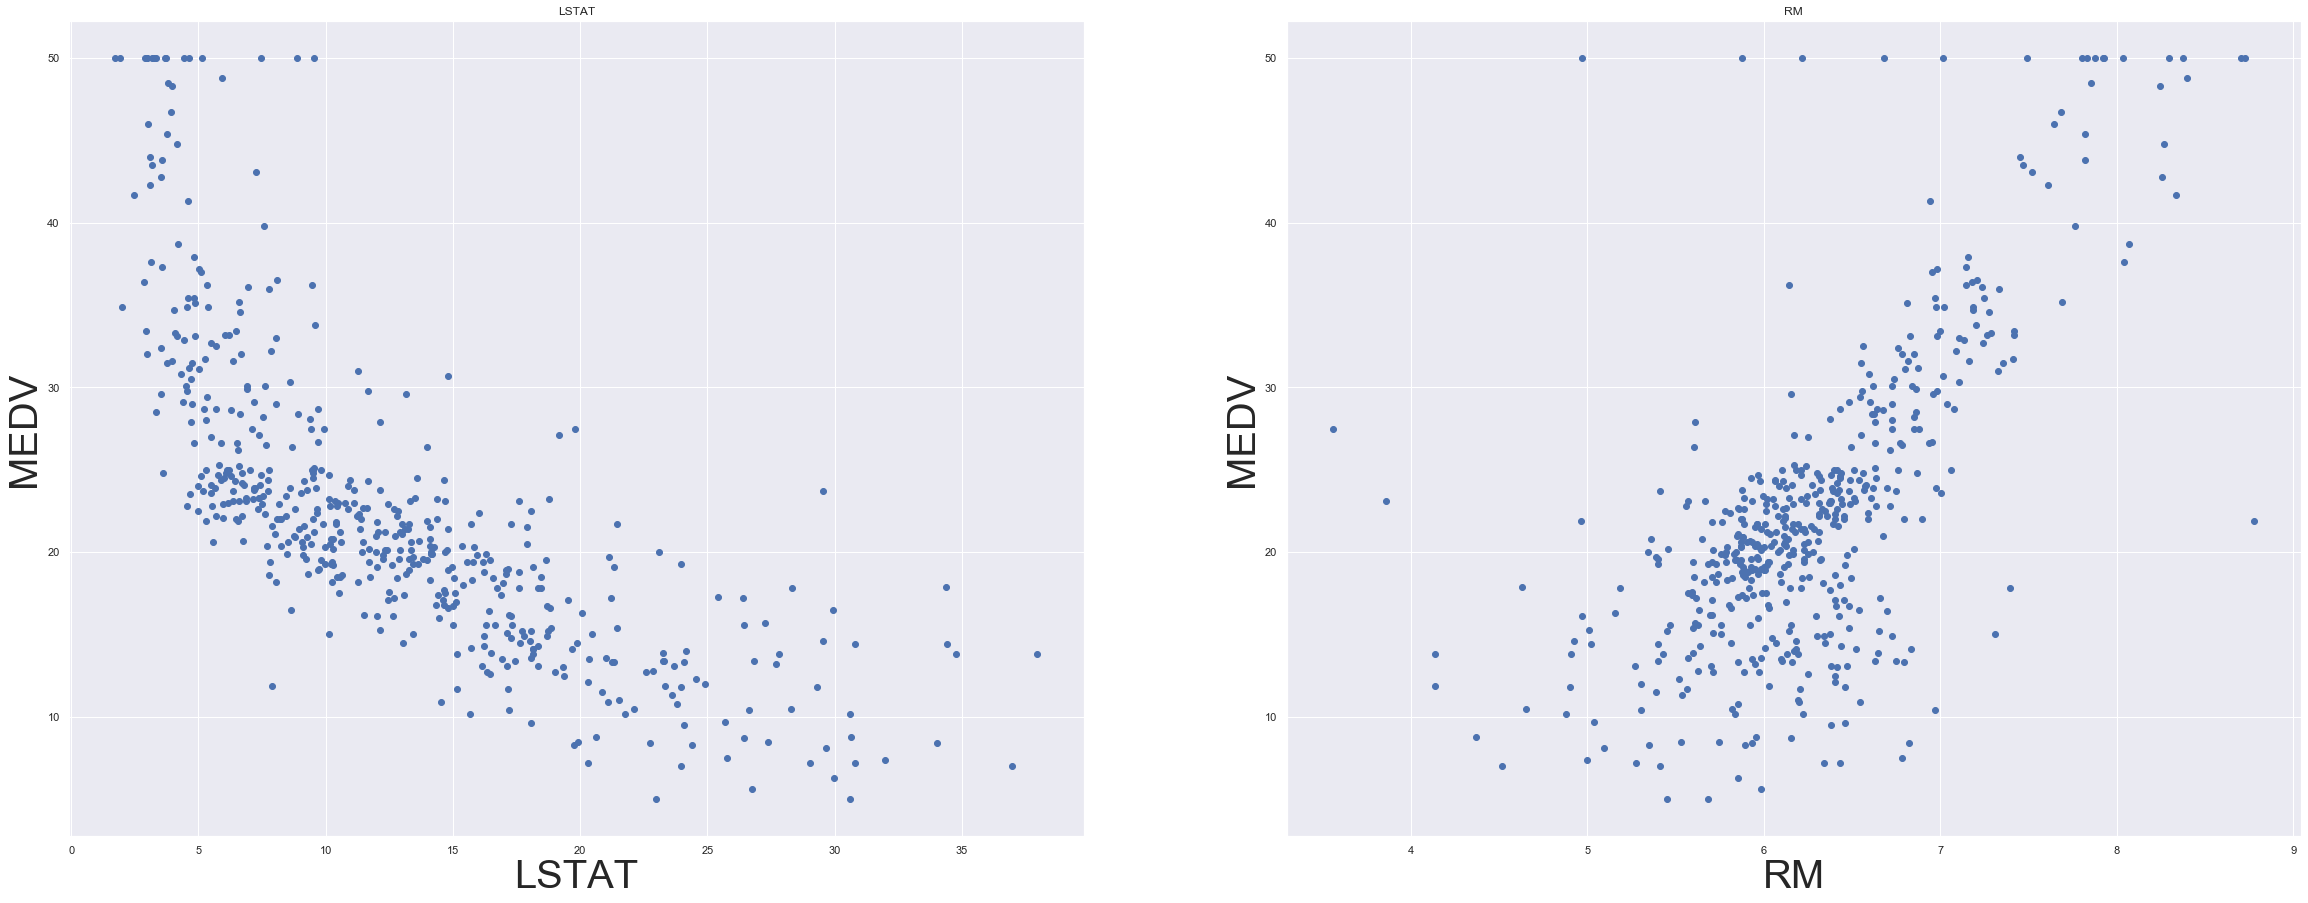

In [101]:
plt.figure(figsize=(40,15))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col, fontsize=40)
    plt.ylabel('MEDV', fontsize=40)

In [102]:
# putting X variables in df and putting target variable into another df
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns=['LSTAT', 'RM'])
Y = boston['MEDV']


In [103]:
# splitting data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


### E8. Following the methods in the tutorial above, do the regression with just the rooms and not the other variable. How does this compare with the scipy result?

This may be helpful is figuring out how to write out the slope and intercept:

https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

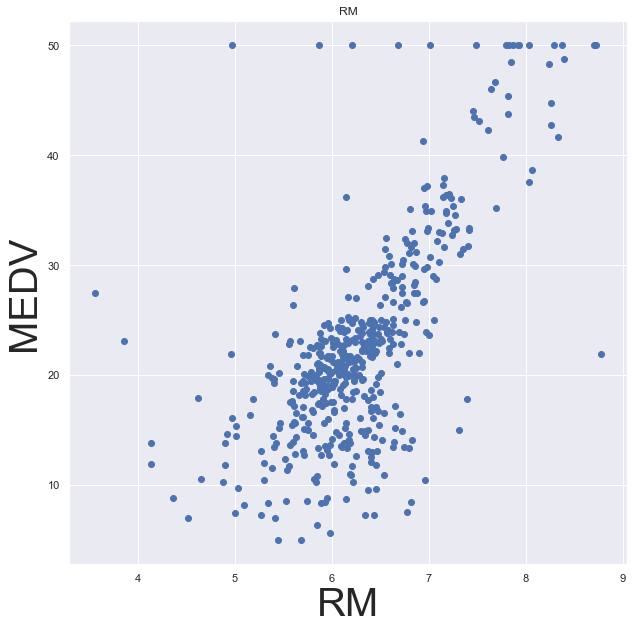

In [106]:
plt.figure(figsize=(10,10))

features = ['RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col, fontsize=40)
    plt.ylabel('MEDV', fontsize=40)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64